**Analysis Redfin Portland Housing Price Data**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

**Read Data**

In [2]:
df_train = pd.read_csv('../data/portland/total.csv')

In [3]:
df_train.columns

Index(['title_link', 'Field1', 'Field2', 'Field3', 'Field4', 'Field5',
       'Field6', 'Field7', 'Field8', 'Field9', 'Field10', 'Field11', 'Field12',
       'Field13', 'Field14', 'Field15', 'Field16', 'Field17', 'Field18',
       'Field19', 'Field20', 'Field21', 'Field22'],
      dtype='object')

In [4]:
df_train.columns = ['link', 'image', 'addr', 'zip', 'redfin_price', 'sold_price', 'Beds', 'Bath', 'SqFt', 'YearBuilt', 'SoldTime', 'Disc', 'Stories', 'Style', 'Community', 'County', 'LotSize', 'ElemSchool', 'MidSchool', 'HighSchool', 'Walk', 'Transit', 'Bike']

In [5]:
df_train.columns

Index(['link', 'image', 'addr', 'zip', 'redfin_price', 'sold_price', 'Beds',
       'Bath', 'SqFt', 'YearBuilt', 'SoldTime', 'Disc', 'Stories', 'Style',
       'Community', 'County', 'LotSize', 'ElemSchool', 'MidSchool',
       'HighSchool', 'Walk', 'Transit', 'Bike'],
      dtype='object')

In [6]:
print(df_train.shape)

(2584, 23)


filter out missing value

In [7]:
new_df = df_train.dropna()

In [8]:
print(new_df.shape)

(1063, 23)


In [9]:
new_df.link = new_df.link.replace([r'.*/fact-check/', r'.*/home/'], ['0','1'], regex=True).astype('int')
new_df.zip = new_df.zip.str.extract(r'(\d+)').astype('int')
new_df.redfin_price = new_df.redfin_price.str.replace(r'$', '')
new_df.redfin_price = new_df.redfin_price.str.replace(r',', '').astype('int')
new_df.sold_price = new_df.sold_price.str.replace(r'$', '')
new_df.sold_price = new_df.sold_price.str.replace(r',', '').astype('int')
new_df.SqFt = new_df.SqFt.str.replace(r',', '').astype('int')
new_df.YearBuilt = new_df.YearBuilt.astype('int')
#new_df.Stories = new_df.Stories.astype('int')
new_df.ElemSchool = new_df.ElemSchool.astype('int')
new_df.MidSchool = new_df.MidSchool.astype('int')
new_df.HighSchool = new_df.HighSchool.astype('int')
new_df.Walk = new_df.Walk.str.extract(r'(\d+)\s*/\s*100').astype('int')
new_df.Transit = new_df.Transit.str.extract(r'(\d+)\s*/\s*100').astype('int')
new_df.Bike = new_df.Bike.str.extract(r'(\d+)\s*/\s*100').astype('int')

/home/ooo/projects/packages/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [10]:
new_df.to_csv('clean.csv')

In [11]:
new_df.YearBuilt.describe()

count    1063.000000
mean     1955.313264
std        30.059713
min      1870.000000
25%      1929.000000
50%      1954.000000
75%      1969.000000
max      2018.000000
Name: YearBuilt, dtype: float64

In [12]:
new_df.link.describe()

count    1.063000e+03
mean     9.458921e+07
std      9.768022e+07
min      2.573485e+07
25%      2.652871e+07
50%      1.258614e+08
75%      1.264867e+08
max      1.147119e+09
Name: link, dtype: float64

In [13]:
print(new_df.iloc[5])

link                                                     26457166
image           /92eca1dafb577d5527908d0847bf6251_genMid.18430...
addr                                             2801 SE 22nd Ave
zip                                                         97202
redfin_price                                               490491
sold_price                                                 485000
Beds                                                            2
Bath                                                            1
SqFt                                                         2144
YearBuilt                                                    1908
SoldTime                                             SOLD 9/28/18
Disc            BOM! Buyer got cold feet. Bring your buyers to...
Stories                                                         1
Style                                          Cottage, Victorian
Community                                               Multnomah
County    

In [14]:
num_df = new_df[['zip', 'Beds', 'Bath', 'SqFt', 'YearBuilt', 'ElemSchool', 'MidSchool', 'HighSchool', 'Walk', 'Transit', 'Bike', 'sold_price']]

In [15]:
print(num_df.columns)

Index(['zip', 'Beds', 'Bath', 'SqFt', 'YearBuilt', 'ElemSchool', 'MidSchool',
       'HighSchool', 'Walk', 'Transit', 'Bike', 'sold_price'],
      dtype='object')


In [16]:
num_df['sold_price'].describe()

count    1.063000e+03
mean     4.372367e+05
std      1.822193e+05
min      1.322100e+05
25%      3.167400e+05
50%      3.800000e+05
75%      5.010000e+05
max      1.694000e+06
Name: sold_price, dtype: float64

**Histogram**

/home/ooo/projects/packages/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


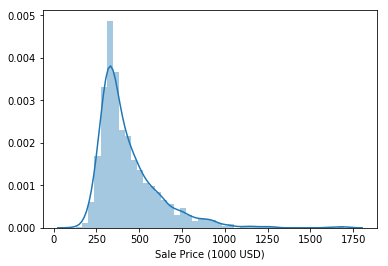

In [17]:
sns.distplot(num_df['sold_price']/1000, axlabel='Sale Price (1000 USD)')

**Relationship Between Numerical Variables**

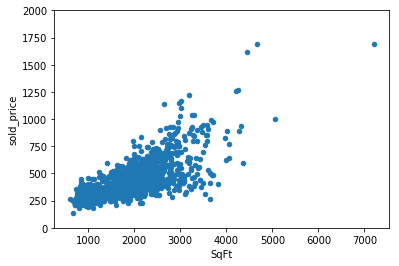

In [18]:
var = 'SqFt'
data = pd.concat([num_df['sold_price']/1000, num_df[var]], axis=1)
data.plot.scatter(x=var, y='sold_price', ylim=(0, 2000))

strong relationship between living room area and saleprice is shown.
kind of a linear relationship.

(-0.5, 9.5, 0, 2000)

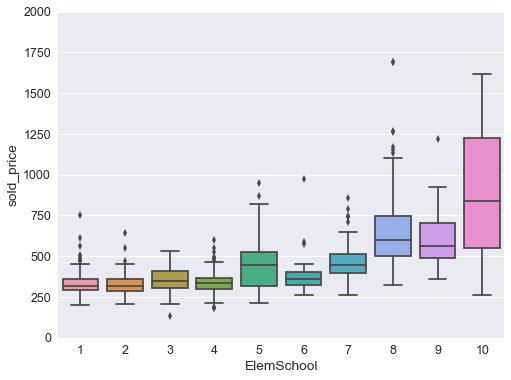

In [42]:
var = 'ElemSchool'
data = pd.concat([num_df['sold_price']/1000, num_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y='sold_price', data=data)
fig.axis(ymin=0, ymax=2000)

strong relationship.

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117]), <a list of 118 Text xticklabel objects>)

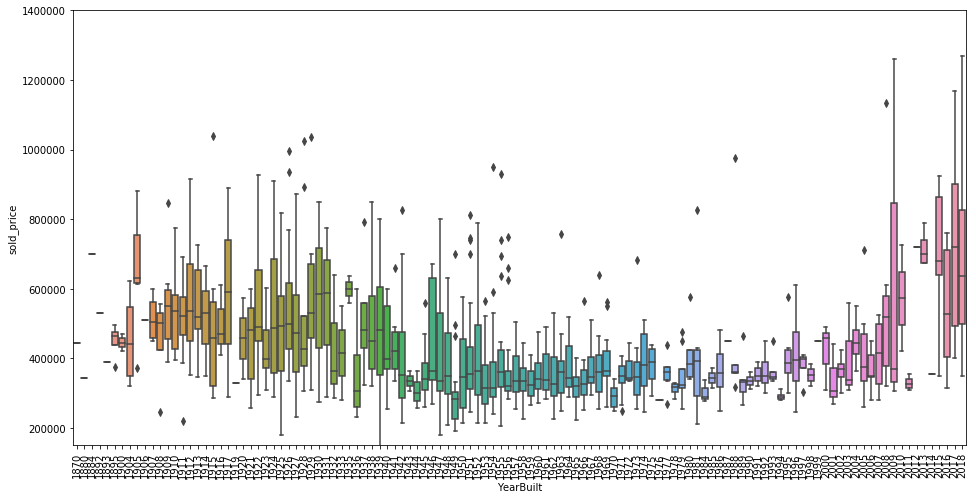

In [20]:
var = 'YearBuilt'
data = pd.concat([num_df['sold_price'], num_df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y='sold_price', data=data)
fig.axis(ymin=150000, ymax=1400000)
plt.xticks(rotation=90)

relationship is not very obverious.

**Correlation Matrix**

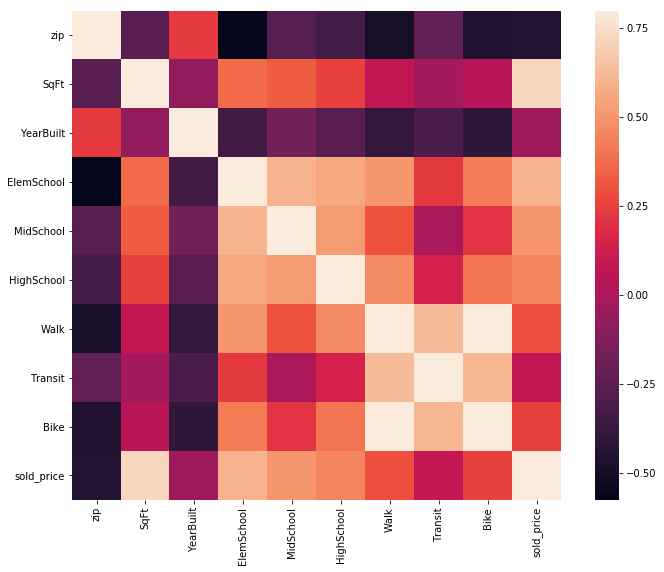

In [21]:
corrmat = num_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

All Garage related stuff seems to be correlated with each other (big white squre). Indeed they are describing the same stuff.

**Top 10 Correlation Matrix Sorted by SalePrice**

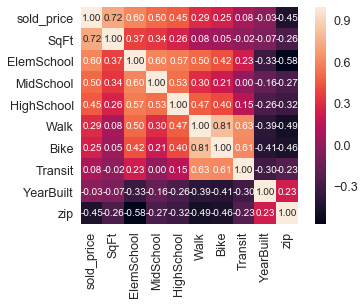

In [22]:
k = 10
cols = corrmat.nlargest(k, 'sold_price')['sold_price'].index
cm = np.corrcoef(num_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'. Check!

'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. However, as we discussed in the last sub-point, the number of cars that fit into the garage is a consequence of the garage area. 'GarageCars' and 'GarageArea' are like twin brothers. You'll never be able to distinguish them. Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).

'TotalBsmtSF' and '1stFloor' also seem to be twin brothers. We can keep 'TotalBsmtSF' just to say that our first guess was right (re-read 'So... What can we expect?').

'FullBath'?? Really?

'TotRmsAbvGrd' and 'GrLivArea', twin brothers again. Is this dataset from Chernobyl?

Ah... 'YearBuilt'... It seems that 'YearBuilt' is slightly correlated with 'SalePrice'. Honestly, it scares me to think about 'YearBuilt' because I start feeling that we should do a little bit of time-series analysis to get this right. I'll leave this as a homework for you.

**Scatter Plots Between 'SalePrice' and Correlated Variables**

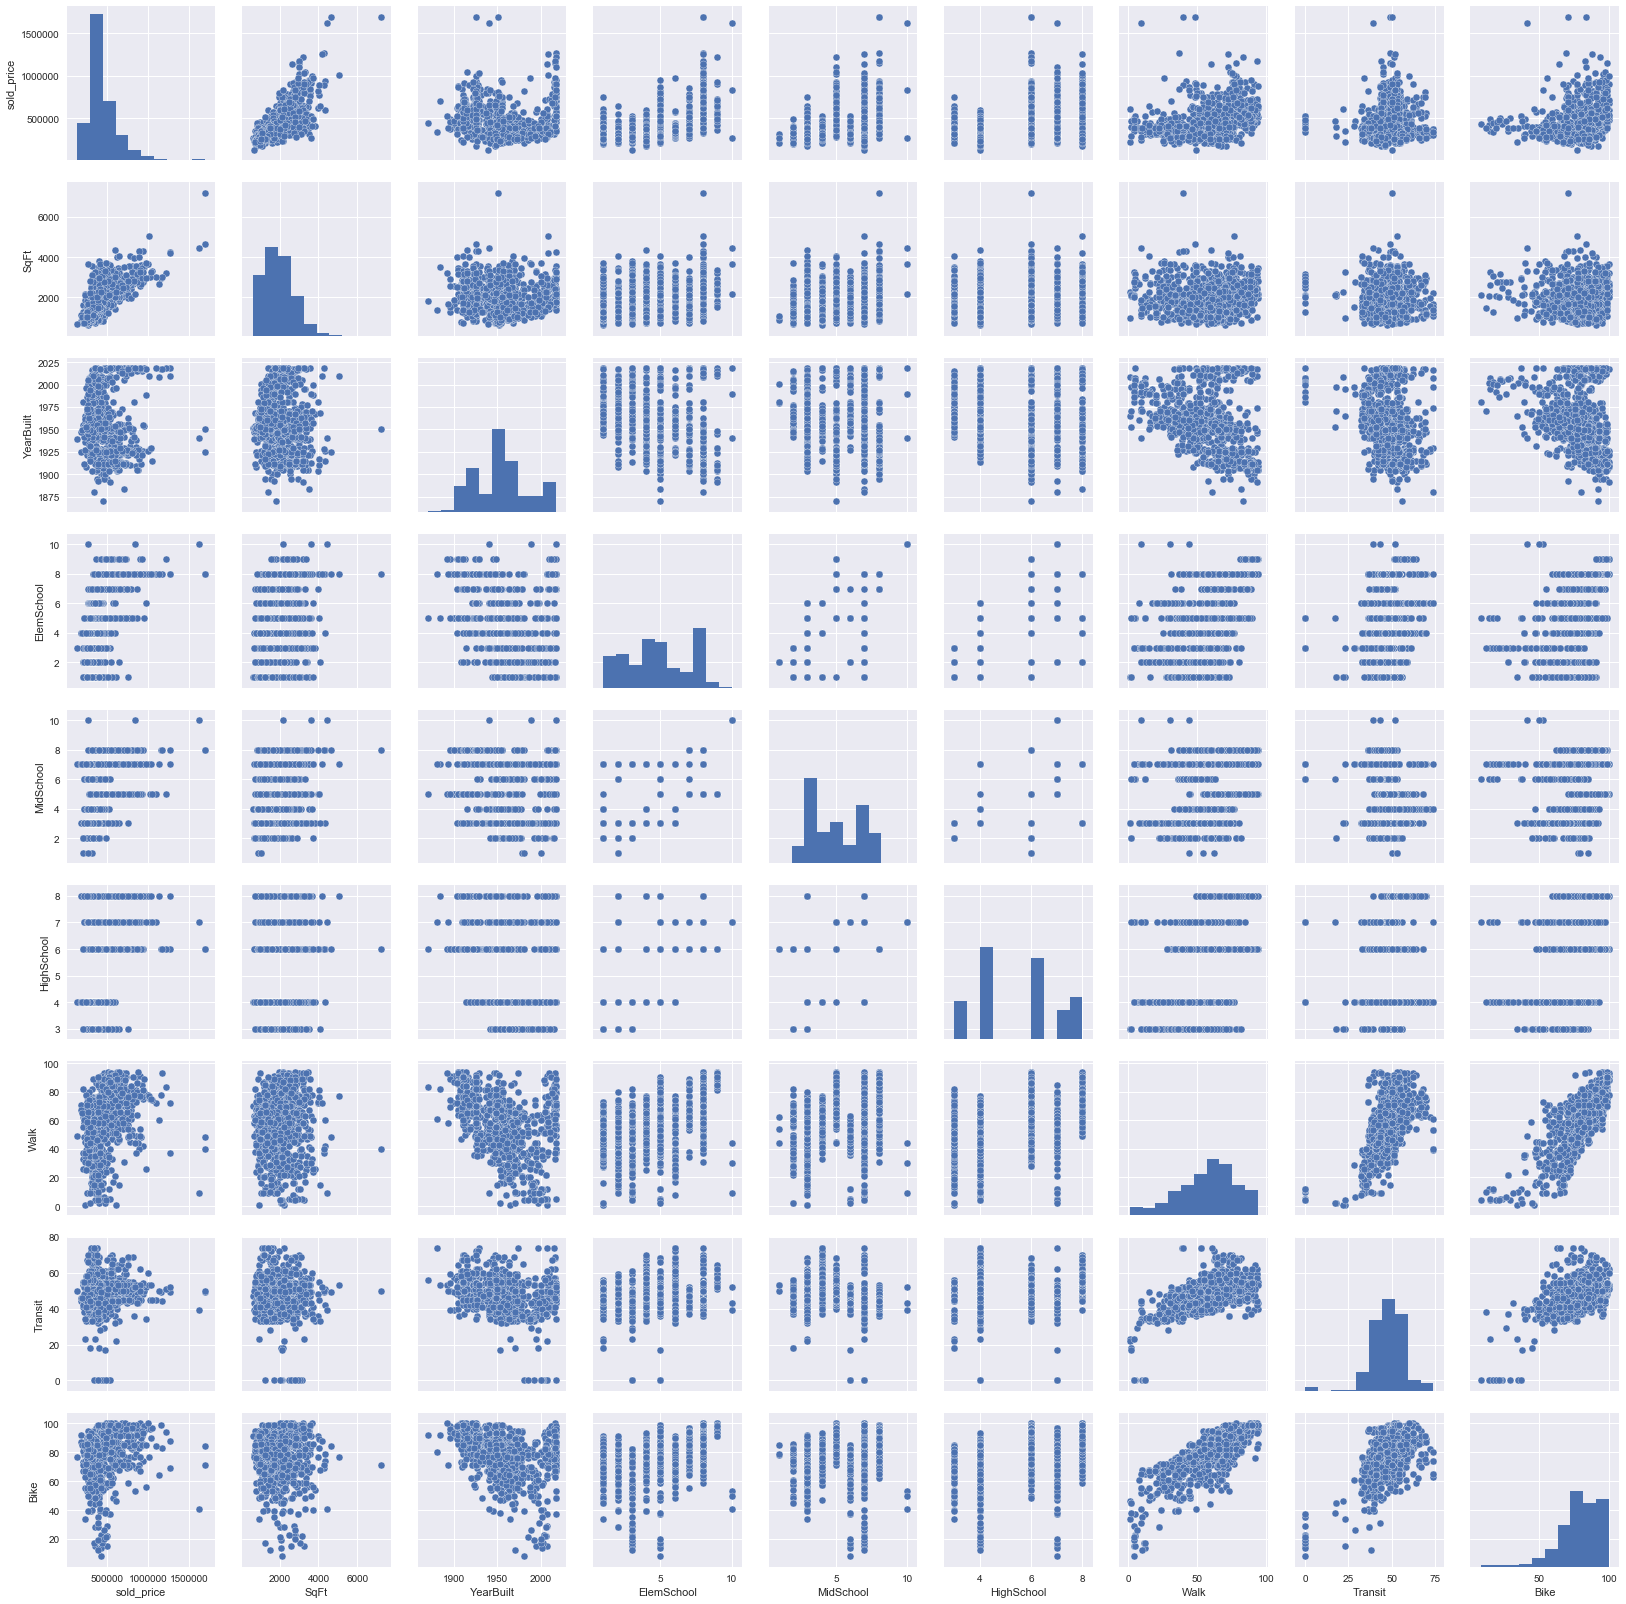

In [21]:
sns.set()
cols = ['sold_price', 'SqFt', 'YearBuilt', 'ElemSchool', 'MidSchool', 'HighSchool', 'Walk', 'Transit', 'Bike']
sns.pairplot(num_df[cols], size = 2.5)
plt.show();

One of the figures we may find interesting is the one between 'TotalBsmtSF' and 'GrLiveArea'. In this figure we can see the dots drawing a linear line, which almost acts like a border. It totally makes sense that the majority of the dots stay below that line. Basement areas can be equal to the above ground living area, but it is not expected a basement area bigger than the above ground living area (unless you're trying to buy a bunker).

The plot concerning 'SalePrice' and 'YearBuilt' can also make us think. In the bottom of the 'dots cloud', we see what almost appears to be a shy exponential function (be creative). We can also see this same tendency in the upper limit of the 'dots cloud' (be even more creative). Also, notice how the set of dots regarding the last years tend to stay above this limit (I just wanted to say that prices are increasing faster now).

In [23]:
path = '/home/ooo/projects/housingprice/images'

In [24]:
image_df = new_df[['image', 'sold_price']]

In [25]:
print(image_df.shape)

(1063, 2)


In [26]:
print(image_df.iloc[5])

image         /92eca1dafb577d5527908d0847bf6251_genMid.18430...
sold_price                                               485000
Name: 6, dtype: object


In [27]:
image_list = [tuple(x) for x in image_df.values]

In [28]:
print(len(image_list), len(image_list[0]))

1063 2


In [29]:
sorted_image_list = sorted(image_list, key=lambda x:x[1])

In [30]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import os.path as osp
import numpy as np
from PIL import Image

In [31]:
def imshow(img):
    npimg = img.numpy()
    plt.figure(figsize = (50, 50))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [32]:
myTrans = transforms.Compose([transforms.ToTensor()])

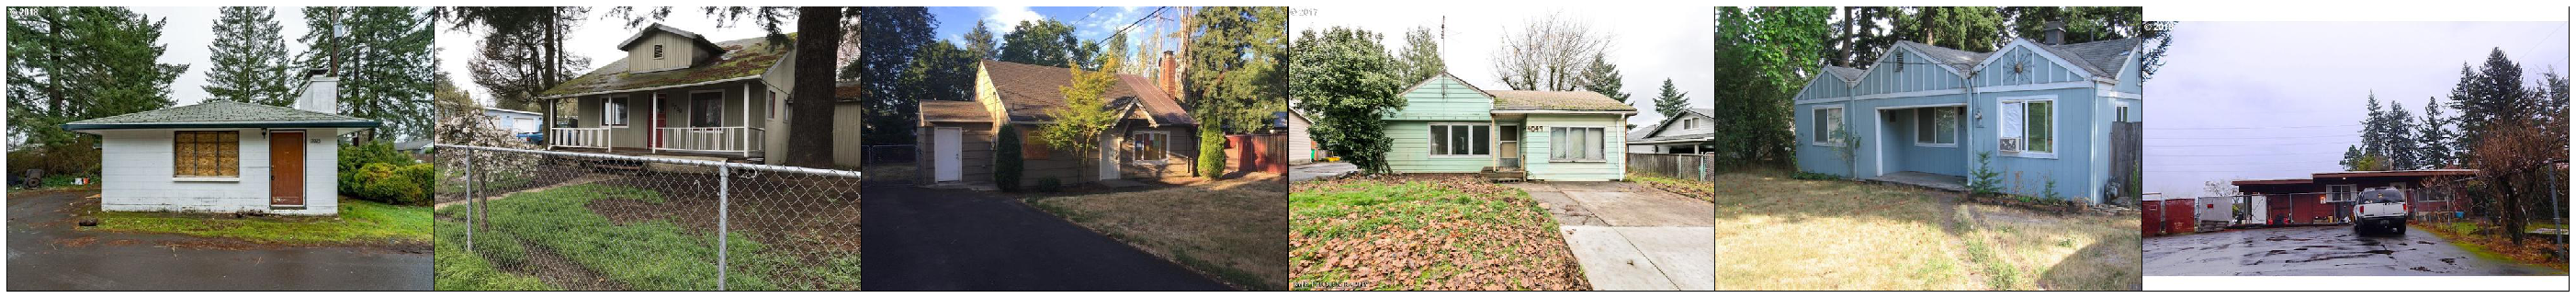

In [35]:
images = list()
for i in range(6):
    baseName = sorted_image_list[i][0]
    fName = path + baseName
    image = Image.open(fName)
    images.append(myTrans(image.copy()))
    image.close()
imshow(torchvision.utils.make_grid(images, nrow=6))

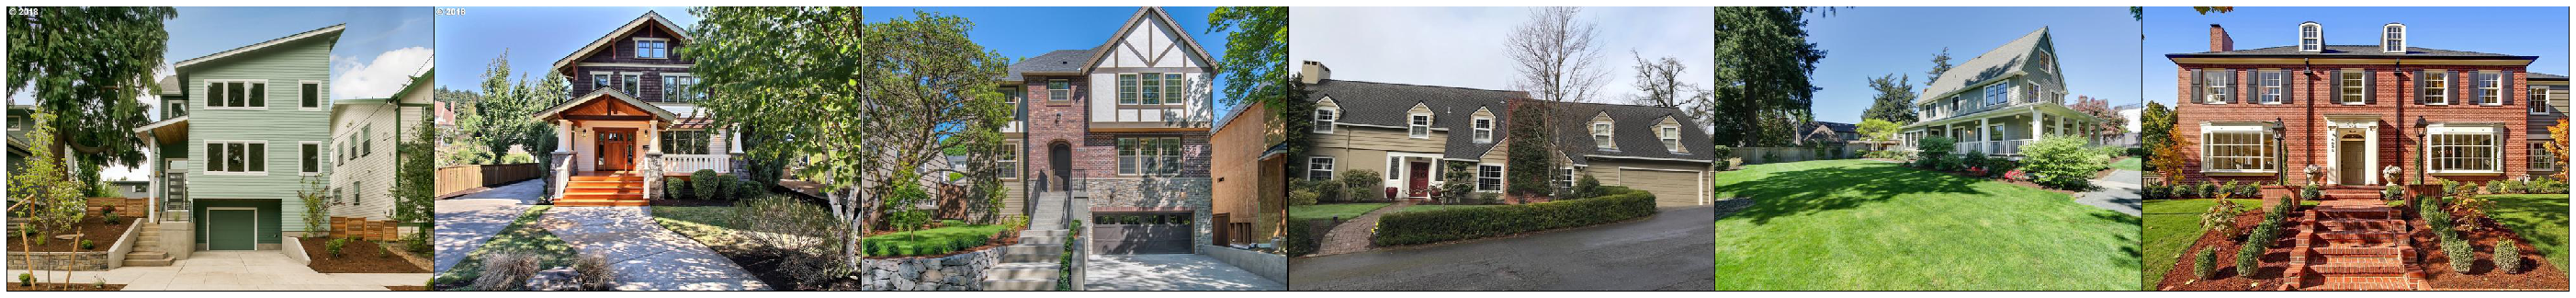

In [36]:
images = list()
for i in reversed(range(6)):
    baseName = sorted_image_list[len(sorted_image_list)-1-i][0]
    fName = path + baseName
    image = Image.open(fName)
    images.append(myTrans(image.copy()))
    image.close()
imshow(torchvision.utils.make_grid(images, nrow=6))

In [37]:
des_df = new_df[['Disc', 'sold_price']]

In [38]:
des_list = [tuple(x) for x in des_df.values]

In [39]:
sorted_des_list = sorted(des_list, key=lambda x:x[1])

In [40]:
print(sorted_des_list[0])

('Opportunity awaits in this 1 bedroom 1 bathroom dwelling. The home offers the chance to earn rental income. It will take some upgrades and repairs to ready this home for renters but it could be worth the time. Come and see if this will be your new investment.', 132210)


In [41]:
print(sorted_des_list[-1])

('Stately Georgian Colonial home designed by Roscoe Hemenway is unveiled as a complete restoration by Portland Houseworks. Grand foyer w/curved staircase, glass hanging chandelier & cstm wainscotting.Mltpl entertaining spaces w/open great rm kitchen anchored by quartz island, formal dining, builtins & white oak floors. Gourmet kitchen w/Walker Zanger tile backsplsh, large Wolf app & sub-zero refrig. Wet bar, kitchenette, dual wine refri.', 1694000)
